# 📊 History Plots:

History Plots for TIFGSM and DeepFool

In [1]:
# IMPORTS
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns

### 1) Load and process Data

In [2]:
# Paths
DATA_PATH   = '../results/attacks/history/catDog/'
RESULTS_PATH = './figures/'

ATTACKS_LIST = ['DeepFool','TIFGSM']

In [3]:
attackListDF = []
for attack in ATTACKS_LIST:
    tmpDF = pd.read_csv(DATA_PATH + "{}.csv".format(attack))
     
    # Only for DeepFool
    if attack == "DeepFool":
        tmpDF['eps'] /= 300
\
    attackListDF.append(tmpDF)

historyDF = pd.concat(attackListDF).reset_index()
historyDF.head()

,index,Unnamed: 0,attack,task,model,balance,dataset,ssim,eps,asr,asr_0,asr_1
0,0,0,DeepFool,catDog,alexnet,20_80,bing,0.949894,0.033333,0.128676,0.284553,0.000000
1,1,1,DeepFool,catDog,alexnet,20_80,bing,0.943518,0.036667,0.143382,0.317073,0.000000
2,2,2,DeepFool,catDog,alexnet,20_80,bing,0.936955,0.040000,0.143382,0.317073,0.000000
3,3,3,DeepFool,catDog,alexnet,20_80,bing,0.929889,0.043333,0.158088,0.341463,0.006711
4,4,4,DeepFool,catDog,alexnet,20_80,bing,0.922923,0.046667,0.176471,0.365854,0.020134


In [4]:
history_ = historyDF[historyDF['balance'] == '20_80']
history_rev = pd.DataFrame(None, columns=['eps', 'Attack', 'Metric', 'ASR'])

for i in history_.index:
    history_rev.loc[len(history_rev)] = [history_.loc[i]["eps"], history_.loc[i]["attack"], "ASR0", history_.loc[i]["asr_0"]]
    history_rev.loc[len(history_rev)] = [history_.loc[i]["eps"], history_.loc[i]["attack"], "ASR1", history_.loc[i]["asr_1"]]
    history_rev.loc[len(history_rev)] = [history_.loc[i]["eps"], history_.loc[i]["attack"], "ASR", history_.loc[i]["asr"]]

history_rev.head()

,eps,Attack,Metric,ASR
0,0.033333,DeepFool,ASR0,0.284553
1,0.033333,DeepFool,ASR1,0.000000
2,0.033333,DeepFool,ASR,0.128676
3,0.036667,DeepFool,ASR0,0.317073
4,0.036667,DeepFool,ASR1,0.000000


### 2) 📊 Plots

In [5]:
COLORS = ["#FC7300", "#1F8A70"]

In [6]:
# Normalize eps to 0-1
condition = history_rev['Attack'] == 'DeepFool'
history_rev.loc[condition, 'eps'] = (history_rev.loc[condition, 'eps'] - history_rev.loc[condition, 'eps'].min()) / (history_rev.loc[condition, 'eps'].max() - history_rev.loc[condition, 'eps'].min()) * 1

condition = history_rev['Attack'] == 'TIFGSM'
history_rev.loc[condition, 'eps'] = (history_rev.loc[condition, 'eps'] - history_rev.loc[condition, 'eps'].min()) / (history_rev.loc[condition, 'eps'].max() - history_rev.loc[condition, 'eps'].min()) * 1

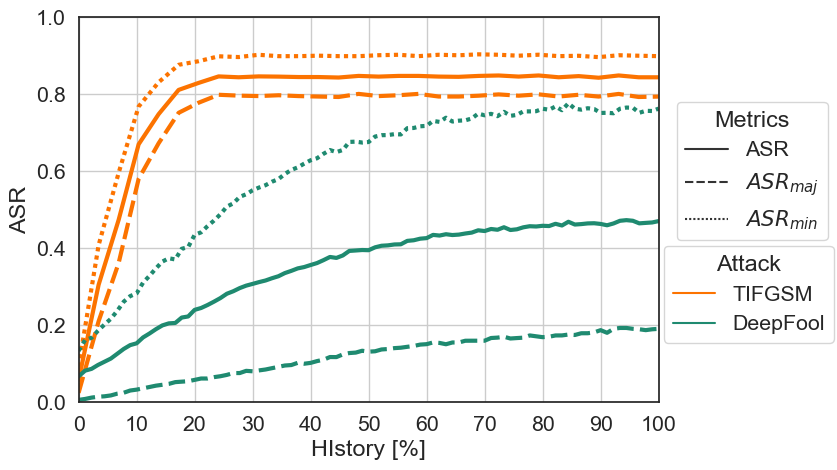

In [8]:
sns.set(style = "white", font_scale=1.4,palette=sns.color_palette(COLORS, desat=None))

fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.lineplot(data = history_rev, x = 'eps', y = 'ASR', style = 'Metric', hue = 'Attack', errorbar=None,linewidth=3,
                  style_order=['ASR','ASR1','ASR0'],hue_order=['TIFGSM','DeepFool'])

# Legends
handles, labels = ax.get_legend_handles_labels()
part1 = ax.legend(handles[1:3], labels[1:3], title="Attack", loc='center right',bbox_to_anchor=(1.32, 0.28))
part2 = ax.legend(handles[4:], ['ASR',r'$ASR_{maj}$',r'$ASR_{min}$'], title="Metrics",loc='center right',bbox_to_anchor=(1.31, 0.6))

ax.add_artist(part1)

plt.subplots_adjust(right=0.85)
plt.xlabel("HIstory [%]")
plt.xticks(np.arange(0,1.1,0.1),np.arange(0,110,10))
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.grid(True)

fig.savefig(RESULTS_PATH + 'hist.pdf', dpi=300, format='pdf', bbox_extra_artists=(part1,part2), bbox_inches='tight')